# HomeWork 8
**DeadLine : 23:59 6 Azar 1400**

**Total points : 100pts**

2 Different account were used for running on GPU, although the data was saved on my original account. The second one was merely for running the cells since the first hit the limit. 

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 719 (delta 32), reused 48 (delta 32), pack-reused 666
Receiving objects: 100% (719/719), 319.77 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_images

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
Completed Image ====> 2.2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit-640x354.jpg
Completed Image ====> 3.sonata-hero-option1-764a5360-edit-640x354.jpg
Image URL: https://www.cnet.com/a/img/CSTqzAl5wJ57HHyASLD-a0vS2O0=/940x528/2021/04/05/9e065d90-51f2-46c5-bd3a-416fd4983c1a/elan

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [2]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [3]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 4. Generator

In [15]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True, 
        )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('train', 
        target_size=(150, 150),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical'
        )
validation_generator = test_datagen.flow_from_directory('test', 
        target_size=(150, 150),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical'
        )


Found 218 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [16]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 150, 150, 3)
(16, 5)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


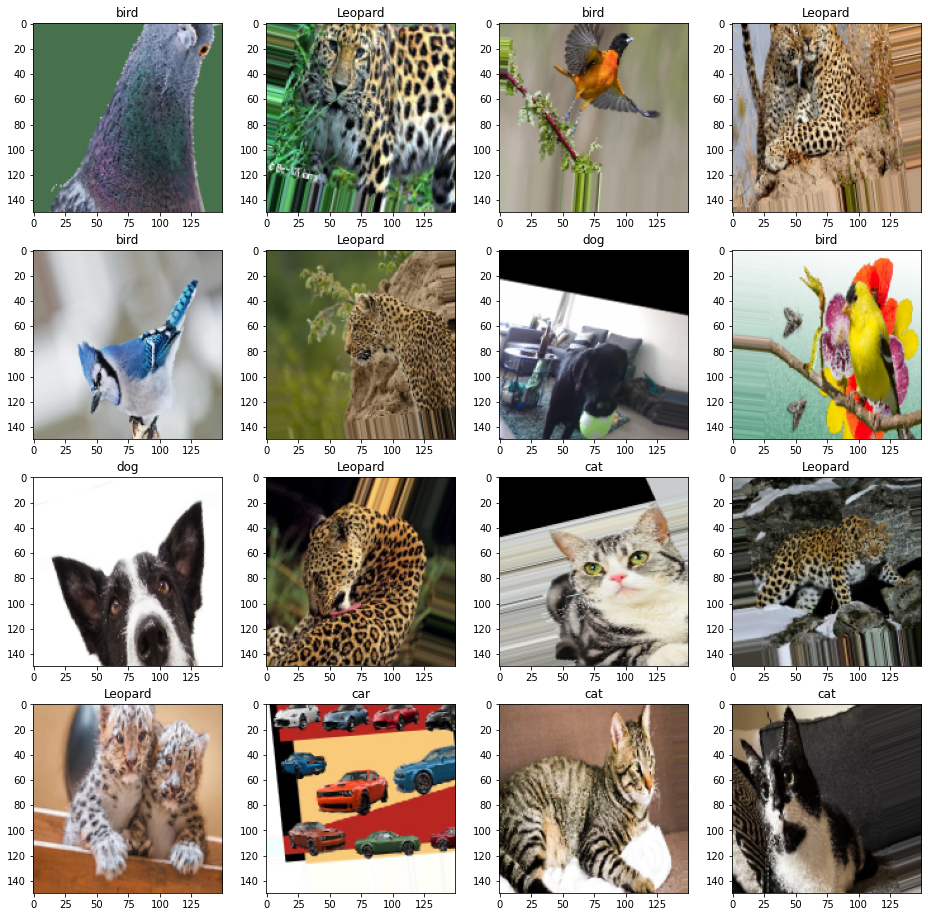

In [17]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [7]:
import keras
from keras import layers
def build_model():
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(150, 150, 3)))
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    return model

In [12]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'Adam'
EPOCHS = 20
BATCH_SIZE = 16
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/20
 2/14 [===>..........................] - ETA: 6s - loss: 170.1518 - accuracy: 0.0938

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 9s 564ms/step - loss: 32.9920 - accuracy: 0.2294 - val_loss: 1.5436 - val_accuracy: 0.3500
Epoch 2/20
14/14 [==============================] - 8s 538ms/step - loss: 1.4337 - accuracy: 0.4037 - val_loss: 1.5498 - val_accuracy: 0.2000
Epoch 3/20
14/14 [==============================] - 8s 539ms/step - loss: 1.2051 - accuracy: 0.5183 - val_loss: 1.3771 - val_accuracy: 0.3667
Epoch 4/20
14/14 [==============================] - 8s 537ms/step - loss: 0.9458 - accuracy: 0.7064 - val_loss: 1.6164 - val_accuracy: 0.2667
Epoch 5/20
14/14 [==============================] - 8s 537ms/step - loss: 0.5927 - accuracy: 0.8211 - val_loss: 1.3796 - val_accuracy: 0.3667
Epoch 6/20
14/14 [==============================] - 8s 537ms/step - loss: 0.2719 - accuracy: 0.9128 - val_loss: 2.0806 - val_accuracy: 0.3667
Epoch 7/20
14/14 [==============================] - 8s 538ms/step - loss: 0.2575 - accuracy: 0.9495 - val_loss: 1.7852 - val_accuracy: 0.4500
Epoch 8/20
14/14

In [13]:
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

4/4 [==============================] - 1s 152ms/step - loss: 3.4999 - accuracy: 0.4000


[3.4999239444732666, 0.4000000059604645]

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = model.predict(validation_generator, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(validation_generator.labels, y_pred_bool, target_names=categories))
confusion_matrix(validation_generator.labels, y_pred_bool)


4/4 [==============================] - 1s 138ms/step
              precision    recall  f1-score   support

     Leopard       0.31      0.38      0.34        13
        bird       0.17      0.10      0.12        10
         car       0.57      0.36      0.44        11
         cat       0.38      0.38      0.38        13
         dog       0.28      0.38      0.32        13

    accuracy                           0.33        60
   macro avg       0.34      0.32      0.32        60
weighted avg       0.34      0.33      0.33        60



array([[5, 1, 1, 3, 3],
       [3, 1, 1, 1, 4],
       [2, 0, 4, 1, 4],
       [3, 2, 1, 5, 2],
       [3, 2, 0, 3, 5]])

# Part B: train model using data augmentation

In [18]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'Adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/20
 2/14 [===>..........................] - ETA: 6s - loss: 23.7973 - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 9s 564ms/step - loss: 9.6470 - accuracy: 0.2798 - val_loss: 1.6036 - val_accuracy: 0.2167
Epoch 2/20
14/14 [==============================] - 8s 536ms/step - loss: 1.6146 - accuracy: 0.1514 - val_loss: 1.6089 - val_accuracy: 0.2000
Epoch 3/20
14/14 [==============================] - 8s 537ms/step - loss: 1.5890 - accuracy: 0.2018 - val_loss: 1.8792 - val_accuracy: 0.1833
Epoch 4/20
14/14 [==============================] - 8s 536ms/step - loss: 1.6081 - accuracy: 0.2523 - val_loss: 1.5919 - val_accuracy: 0.2500
Epoch 5/20
14/14 [==============================] - 8s 538ms/step - loss: 1.5938 - accuracy: 0.2936 - val_loss: 1.5791 - val_accuracy: 0.3333
Epoch 6/20
14/14 [==============================] - 8s 539ms/step - loss: 1.5559 - accuracy: 0.2477 - val_loss: 1.5485 - val_accuracy: 0.2500
Epoch 7/20
14/14 [==============================] - 8s 537ms/step - loss: 1.5856 - accuracy: 0.2982 - val_loss: 1.5957 - val_accuracy: 0.2333
Epoch 8/20
14/14 

In [19]:
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

4/4 [==============================] - 1s 152ms/step - loss: 1.2981 - accuracy: 0.4667


[1.298126220703125, 0.46666666865348816]

In [21]:
y_pred = model.predict(validation_generator, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(validation_generator.labels, y_pred_bool, target_names=categories))
confusion_matrix(validation_generator.labels, y_pred_bool)

4/4 [==============================] - 1s 158ms/step
              precision    recall  f1-score   support

     Leopard       0.00      0.00      0.00        13
        bird       0.43      0.30      0.35        10
         car       0.09      0.09      0.09        11
         cat       0.29      0.46      0.35        13
         dog       0.21      0.31      0.25        13

    accuracy                           0.23        60
   macro avg       0.20      0.23      0.21        60
weighted avg       0.20      0.23      0.21        60



array([[0, 0, 5, 3, 5],
       [0, 3, 2, 2, 3],
       [1, 0, 1, 5, 4],
       [1, 2, 1, 6, 3],
       [0, 2, 2, 5, 4]])

# Part C: build and train model with dropout

In [29]:
def build_modelC():
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(150, 150, 3)))
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(0.05))
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    return model

In [30]:
model = build_modelC()
loss = 'categorical_crossentropy'
optimizer = 'Adam'
EPOCHS = 20
BATCH_SIZE = 16
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
14/14 [==============================] - 9s 596ms/step - loss: 10.5214 - accuracy: 0.2064 - val_loss: 1.6042 - val_accuracy: 0.2000
Epoch 2/20
14/14 [==============================] - 8s 569ms/step - loss: 1.6121 - accuracy: 0.2018 - val_loss: 1.6069 - val_accuracy: 0.3167
Epoch 3/20
14/14 [==============================] - 8s 572ms/step - loss: 1.6001 - accuracy: 0.2752 - val_loss: 1.5784 - val_accuracy: 0.3167
Epoch 4/20
14/14 [==============================] - 8s 572ms/step - loss: 1.5970 - accuracy: 0.2569 - val_loss: 1.5954 - val_accuracy: 0.2500
Epoch 5/20
14/14 [==============================] - 8s 576ms/step - loss: 1.5936 - accuracy: 0.2982 - val_loss: 1.5160 - val_accuracy: 0.4167
Epoch 6/20
14/14 [==============================] - 8s 572ms/step - loss: 1.5234 - accuracy: 0.3211 - val_loss: 1.3798 - val_accuracy: 0.5167
Epoch 7/20
14/14 [==============================] - 8s 572ms/step - loss: 1.4073 - accuracy: 0.3670 - val_loss: 1.5247 - val_accuracy: 0.4167
Epoch

In [31]:
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

4/4 [==============================] - 1s 153ms/step - loss: 1.1758 - accuracy: 0.4833


[1.1758474111557007, 0.4833333194255829]

In [32]:
y_pred = model.predict(validation_generator, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(validation_generator.labels, y_pred_bool, target_names=categories))
confusion_matrix(validation_generator.labels, y_pred_bool)

4/4 [==============================] - 1s 155ms/step
              precision    recall  f1-score   support

     Leopard       0.19      0.23      0.21        13
        bird       0.00      0.00      0.00        10
         car       0.17      0.18      0.17        11
         cat       0.20      0.08      0.11        13
         dog       0.20      0.31      0.24        13

    accuracy                           0.17        60
   macro avg       0.15      0.16      0.15        60
weighted avg       0.16      0.17      0.15        60



array([[3, 2, 3, 2, 3],
       [7, 0, 1, 0, 2],
       [2, 3, 2, 0, 4],
       [2, 0, 3, 1, 7],
       [2, 2, 3, 2, 4]])